In [24]:
path = '/home/dueo/Dropbox/Server_Sync/vgg_faces/'
!ls path

ls: cannot access path: No such file or directory


(-128.18237837200164, 150.23367849121092)


(numpy.ndarray, (224, 224, 3), (1, 224, 224, 3), -5.9293903406940967)

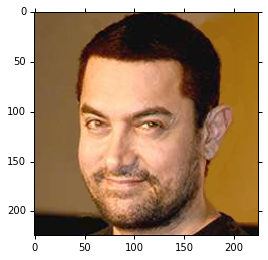

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import matplotlib.image as mpimg
import os.path 
img = mpimg.imread(os.path.join(path, 'ak.png'))
plt.imshow(img)
img = img*256
img = img - (129.1863,104.7624,93.5940)
print((img.min(), img.max()))
imgs = img.reshape((1,224,224,3))
(type(img), img.shape, imgs.shape, imgs[0].mean())

In [30]:
import tensorflow as tf
print("Tensor Flow Version %s" %tf.__version__)
import numpy as np
tf.reset_default_graph() #Fresh graph, simulates a restart of the kernel 
with tf.gfile.FastGFile(os.path.join(path, 'vgg_faces.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')
    print(graph_def.ByteSize())
    #print(graph_def)
    with tf.Session() as sess:
        pred = sess.graph.get_tensor_by_name('prob:0')
        fc6 = sess.graph.get_tensor_by_name('fc6/fc6:0')
        fc7 = sess.graph.get_tensor_by_name('fc7/fc7:0')
        fc8 = sess.graph.get_tensor_by_name('fc8/fc8:0')
        fc6_v, fc7_v, fc8_v, pred_val = sess.run((fc6,fc7,fc8,pred), feed_dict={'Placeholder:0':imgs})

Tensor Flow Version 0.8.0rc0
580024486


In [31]:
fc6_v.shape, fc7_v.shape, fc8_v.shape, pred_val.shape

((1, 4096), (1, 4096), (1, 2622), (1, 2622))

In [39]:
names = tf.gfile.GFile(os.path.join(path, 'names.txt')).readlines()
np.argmax(pred_val), names[np.argmax(pred_val)], pred_val.max()

(2, 'Aamir_Khan\n', 0.85618901)

In [40]:
ops = tf.get_default_graph().get_operations()
for i in ops:
    print i.name

Placeholder
conv1_1/weights
conv1_1/weights/read
conv1_1/biases
conv1_1/biases/read
conv1_1/Conv2D
conv1_1/BiasAdd
conv1_1/Reshape/shape
conv1_1/Reshape
conv1_1/conv1_1
conv1_2/weights
conv1_2/weights/read
conv1_2/biases
conv1_2/biases/read
conv1_2/Conv2D
conv1_2/BiasAdd
conv1_2/Reshape/shape
conv1_2/Reshape
conv1_2/conv1_2
pool1
conv2_1/weights
conv2_1/weights/read
conv2_1/biases
conv2_1/biases/read
conv2_1/Conv2D
conv2_1/BiasAdd
conv2_1/Reshape/shape
conv2_1/Reshape
conv2_1/conv2_1
conv2_2/weights
conv2_2/weights/read
conv2_2/biases
conv2_2/biases/read
conv2_2/Conv2D
conv2_2/BiasAdd
conv2_2/Reshape/shape
conv2_2/Reshape
conv2_2/conv2_2
pool2
conv3_1/weights
conv3_1/weights/read
conv3_1/biases
conv3_1/biases/read
conv3_1/Conv2D
conv3_1/BiasAdd
conv3_1/Reshape/shape
conv3_1/Reshape
conv3_1/conv3_1
conv3_2/weights
conv3_2/weights/read
conv3_2/biases
conv3_2/biases/read
conv3_2/Conv2D
conv3_2/BiasAdd
conv3_2/Reshape/shape
conv3_2/Reshape
conv3_2/conv3_2
conv3_3/weights
conv3_3/weights/re